In [1]:
from IPython.display import Image

### Lecture Material: 

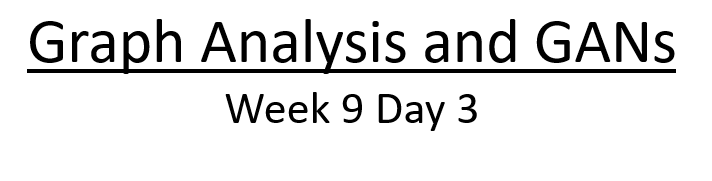

In [2]:
Image("1.PNG")

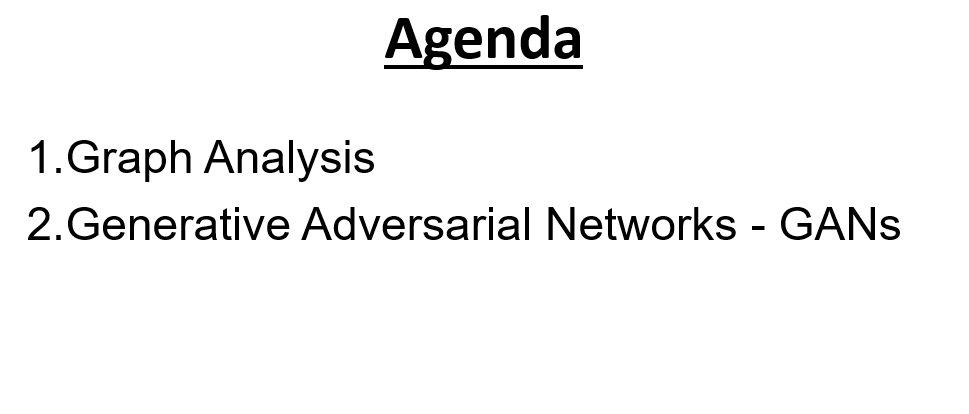

In [4]:
Image("2.PNG")

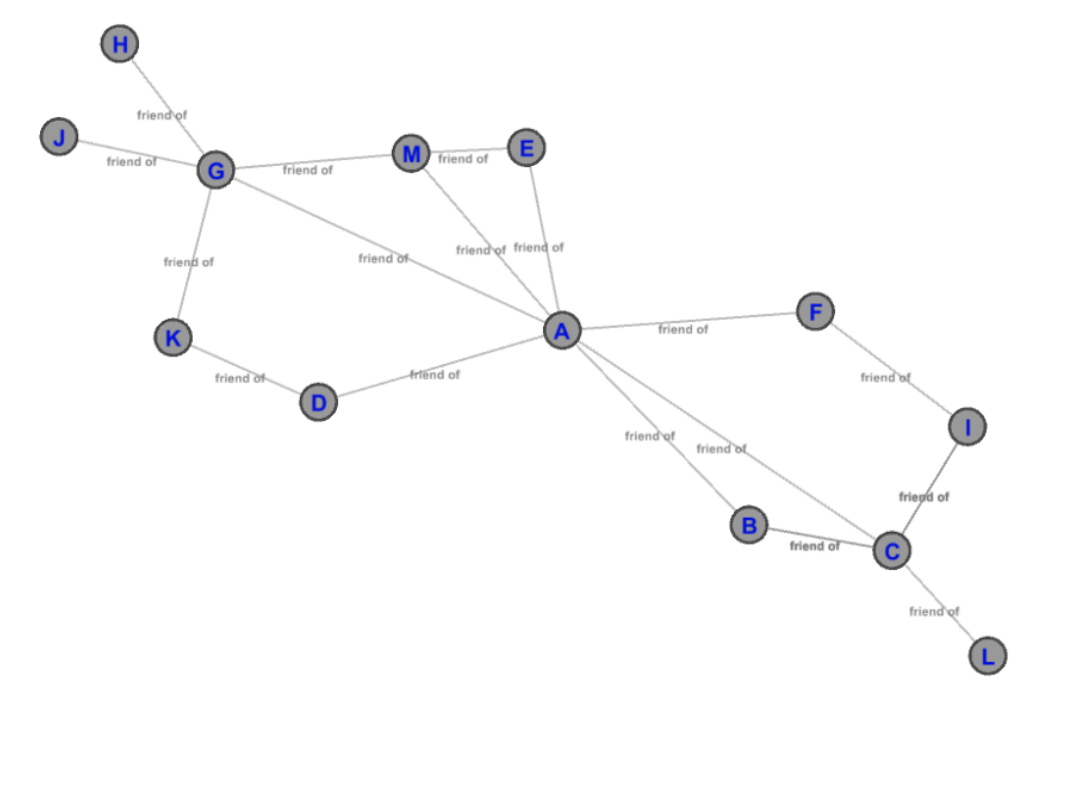

In [5]:
Image("graph1.PNG")

#### Above - graph of friends where the node/entity such as A,B etc. depicts a particular individual and a link (also known as an edge) between any two individuals depicts a relation (“friendship” in this case) between them.

#### General Graph Definition - a representation of relationships between “entities” or “things” where as these “entities” are the “nodes” (also known as “vertices”) of the graph and the relationships between them are represented by “links” (also known as “edges”) of the graph. The study of graphs is also known as “Graph Theory/Analytics”

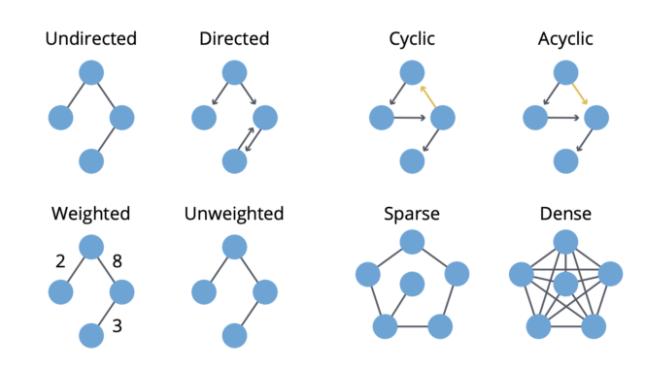

In [6]:
Image("graphs.PNG")

### Why do we need Graph Analysis
1. Recommender systems use graphical models and graph analysis

2. Spotting real-time fraud, which applies to fraudulent transactions and applications in banking, benefits fraud in government, applications and claims fraud in insurance and fraudulent activities in telecommunications

3. Supply chain logistics optimizations

4. Applying influencer analysis in social network communities

5. Performing grid and network quality of service such as identifying weaknesses in power grids, water grids and transportation networks as well as helping prevent cybercrime attacks on computer networks

6. Optimizing routes in the airlines and retail and manufacturing industries as well as for supply distribution chains and logistics

7. Conducting research in life sciences (bioinformatics) including medical research, disease pathologies. One of the first diagnosis algorithms was a **LARGE** graphical model.

### Step 1 - Creating Graphs
https://www.datacamp.com/community/tutorials/social-network-analysis-python
#### Create dataframe to analyze graph data

In [3]:
import networkx as nx
import matplotlib

G_symmetric = nx.Graph()
G_symmetric.add_edge('Ryan Reynolds','Ryan Gosling')
G_symmetric.add_edge('Ryan Reynolds','Dwayne Johnson')
G_symmetric.add_edge('Ryan Reynolds','Bart Simpson')
G_symmetric.add_edge('Ryan Reynolds','Donald Trump')
G_symmetric.add_edge('Ryan Gosling','Dwayne Johnson')
G_symmetric.add_edge('Ryan Gosling','Bart Simpson')
G_symmetric.add_edge('Ryan Gosling','Donald Trump')
G_symmetric.add_edge('Donald Trump','Dwayne Johnson')

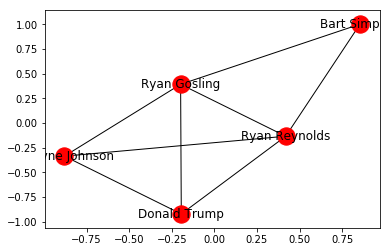

In [5]:
nx.draw_networkx(G_symmetric)

#### Symmetric Networks
The first network of actors that we created above is a symmetric network because the relationship "working together in a movie" is a symmetric relationship. If A is related to B, B is also related to A. Let us create the network we saw above in NetworkX.

#### Asymmetric Networks / DGM
What if the relationship between nodes is 'child of', then the relationship is no longer symmetric. Un-directed Graphical Model.

If A is the child of B, then B is not a child of A. Such a network where the relationship is asymmetric (A is related to B, does not necessarily means that B is associated with A) is called an Asymmetric network.

We can build the asymmetric network in NetworkX using DiGraph method, which is short of Directed Graph. Let us make an asymmetric graph.

In [4]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')
G_asymmetric.add_edge('D','A')

Now we visualize it. We can use the draw_networkx() function as before. However, it is possible that nodes do not separate out and are distinctly visible in the network drawn. To take care of this, we can use the function to force a layout, which positions the nodes in a manner that we can distinctly see them. We can accomplish this using spring_layout() function, followed by the draw_networkx() function.

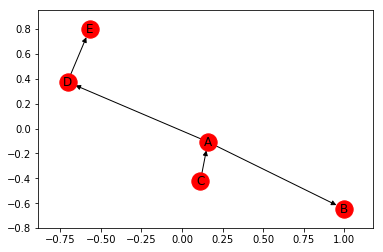

In [10]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

### Weighted Networks
Till now we had networks without weights (just representing relations), but it is possible that networks are made with weights

For example, if in our initial network we consider the number of movies done together as a weight, we will get a Weighted Network.

Let us make one again of the actors, but this time we add weight to the network, each edge has a weight signifying the number of movies they have done together.

In [5]:
G_weighted = nx.Graph()

G_weighted.add_edge('Ryan Reynolds','Ryan Gosling', weight=25)
G_weighted.add_edge('Ryan Reynolds','Dwayne Johnson', weight=8)
G_weighted.add_edge('Ryan Reynolds','Bart Simpson', weight=11)
G_weighted.add_edge('Ryan Reynolds','Donald Trump', weight=1)
G_weighted.add_edge('Ryan Gosling','Dwayne Johnson', weight=4)
G_weighted.add_edge('Ryan Gosling','Bart Simpson',weight=7)
G_weighted.add_edge('Ryan Gosling','Donald Trump', weight=1)
G_weighted.add_edge('Donald Trump','Dwayne Johnson',weight=1)            

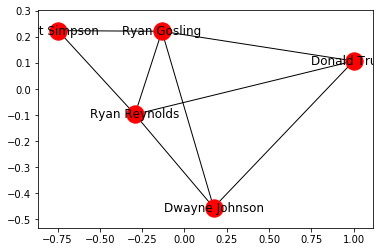

In [19]:
nx.spring_layout(G_weighted)
nx.draw_networkx(G_weighted)

The figure above shows the weighted network of actors in a circular layout. The edge length specifies the weight between two nodes.

### Multigraph
We can give different attributes to the edges. 

For example, we can define a relation of 'neighbor' between two nodes 'A' and 'B' using the 'relation' attribute. 

If within a network two nodes are connected with two different edges (relations) we have a multigraph. 

We can make a multigraph utilizing the MultiGraph class.

In [13]:
G = nx.MultiGraph()

G.add_edge('A','B',relation ='neighbor')
G.add_edge('A','B',relation='friend')
G.add_edge('A','B',relation='same birthday!')

G.add_edge('B','C', relation='neighbor')

G.add_edge('D','C',relation='friend')

G.add_edge('D','C',relation='neighbor')

1

In [14]:
G.edges()

MultiEdgeDataView([('A', 'B'), ('A', 'B'), ('A', 'B'), ('B', 'C'), ('C', 'D'), ('C', 'D')])

In [13]:
G.nodes()

NodeView(('A', 'B', 'C', 'D'))

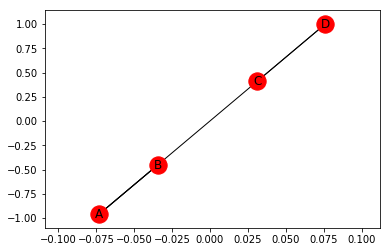

In [16]:
nx.draw_networkx(G)

### Network Connectivity
Now that the network is made, can we find out more about a particular node in the network? Let's explore some ways to define nodes.

### Degree
Degree of a node defines the number of connections a node has. NetworkX has the function degree which we can use to determine the degree of a node in the network.

In [7]:
nx.degree(G_symmetric, 'Dwayne Johnson')

3

In [15]:
nx.degree(G,'A')

3

In [16]:
nx.degree(G_symmetric)

DegreeView({'Ryan Reynolds': 4, 'Ryan Gosling': 4, 'Dwayne Johnson': 3, 'Bart Simpson': 2, 'Donald Trump': 3})

### Clustering Coefficient
It is observed that people who share connections in a social network tend to form associations. 

In other words, there is a tendency in a social network to form clusters. 

We can determine the clusters of a node, Local Clustering Coefficient, which is the fraction of pairs of the node's friends (that is connections) that are connected with each other. 

To determine the local clustering coefficient, we make use of nx.clustering(Graph, Node) function.



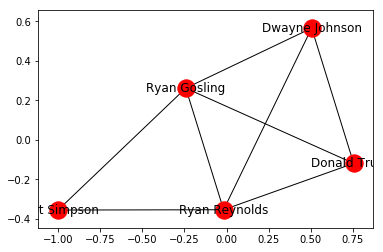

In [42]:
nx.draw_networkx(G_symmetric)

In [12]:
nx.average_clustering(G_symmetric)

0.8666666666666666

In [8]:
G2 = nx.Graph()
G2.add_edge('Ryan Reynolds','Ryan Gosling')
G2.add_edge('Ryan Gosling','Dwayne Johnson')
G2.add_edge('Dwayne Johnson','Bart Simpson')
G2.add_edge('Bart Simpson','Donald Trump')
G2.add_edge('Donald Trump','Ryan Reynolds')

C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


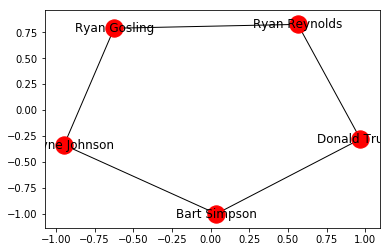

In [19]:
nx.spring_layout(G2)
nx.draw_networkx(G2)

In [20]:
nx.average_clustering(G2)

0.0

#### Finding the shortest path

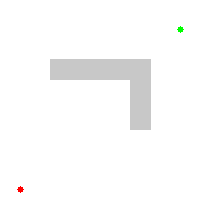

In [2]:
Image("pathfinding.gif")

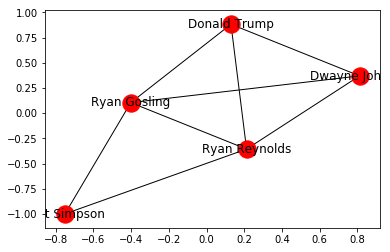

In [41]:
nx.draw_networkx(G_symmetric)

In [13]:
nx.shortest_path(G_symmetric, 'Donald Trump', 'Bart Simpson')

['Donald Trump', 'Ryan Reynolds', 'Bart Simpson']

In [43]:
G_weighted = nx.Graph()
G_weighted.add_edge('Ryan Reynolds','Ryan Gosling', weight=25)
G_weighted.add_edge('Ryan Reynolds','Dwayne Johnson', weight=8)
G_weighted.add_edge('Ryan Reynolds','Bart Simpson', weight=11) #
G_weighted.add_edge('Ryan Reynolds','Donald Trump', weight=1) #
G_weighted.add_edge('Ryan Gosling','Dwayne Johnson', weight=4)
G_weighted.add_edge('Ryan Gosling','Bart Simpson',weight=7)
G_weighted.add_edge('Ryan Gosling','Donald Trump', weight=1) 
G_weighted.add_edge('Donald Trump','Dwayne Johnson',weight=1)  

In [44]:
nx.shortest_path(G_weighted, 'Donald Trump', 'Bart Simpson') #Prefers highest Weight

['Donald Trump', 'Ryan Reynolds', 'Bart Simpson']

### Network Influencers
Above we learned some of the network distance measures, they are useful in knowing how the information will spread through the network. In this section, we will learn how to find the most important nodes (individuals) in the network. These parameters are called as centrality measures.

**Because we can define "importance" in different ways, we have many defintions of Centrality** 

### Degree Centrality
The people most popular or more liked usually are the ones who have more friends. Degree centrality is a measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections. NetworkX has the function degree_centrality() to calculate the degree centrality of all the nodes of a network.

### Eigenvector Centrality
It is not just how many individuals one is connected too, but the type of people one is connected with that can decide the importance of a node. This metric measures the importance of a node in a graph as a function of the importance of its neighbors. If a node is connected to highly important nodes (higher degree for example), it will have a higher Eigen Vector Centrality score as compared to a node which is connected to lesser important nodes.

### Betweenness Centrality
The Betweenness Centrality is the centrality of control. It represents the frequency at which a point occurs on the geodesic (shortest paths) that connect pair of points. **It quantifies how many times a particular node comes in the shortest chosen path between two other nodes.** The nodes with high betweenness centrality play a significant role in the communication/information flow within the network. The nodes with high betweenness centrality can have a strategic control and influence on others. An individual at such a strategic position can influence the whole group, by either withholding or coloring the information in transmission.

Networkx has the function betweenness_centrality() to measure it for the network. It has options to select if we want betweenness values to be normalized or not, weights to be included in centrality calculation or not, and to include the endpoints in the shortest path counts or not.

In [17]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [18]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


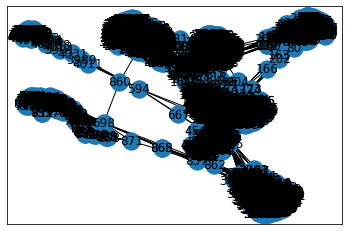

In [17]:
nx.draw_networkx(G_fb)

In [12]:
degCent = nx.degree_centrality(G_fb)

print('The most well-connected person knows',max(degCent.values())*100,'percent of the people in the network!')

The most well-connected person knows 25.8791480931154 percent of the people in the network!


Reading and Sources:
1. https://towardsdatascience.com/graph-analytics-introduction-and-concepts-of-centrality-8f5543b55de3
2. https://towardsdatascience.com/introduction-to-graphs-part-1-2de6cda8c5a5
3. https://towardsdatascience.com/graph-algorithms-part-2-dce0b2734a1d
4. https://towardsdatascience.com/learning-in-graphs-with-python-part-3-8d5513eef62d